In [1]:
from ortools.linear_solver import pywraplp

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from itertools import combinations
import time

In [3]:
number_tickets = 10
seating_rows = 30
seating_columns = 30
number_seats = seating_rows * seating_columns
seat_depth = 0.5
seat_depth_gap = 0.2
seat_width = 0.5
seat_width_gap = 0.2

In [4]:
x_seats = np.array( [ (i % seating_columns) * (seat_width + seat_width_gap) + (seat_width / 2) for i in range(number_seats) ] )

In [5]:
y_seats = np.array( [ (i // seating_columns) * (seat_depth + seat_depth_gap) + (seat_depth / 2) for i in range(number_seats) ] )

In [6]:
#ticket_size = np.random.randint(low =1, high = 10, size = number_tickets)
ticket_size = np.ones(number_tickets)

In [7]:
ticket_size

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [8]:
def main():
    # Data
    
        
    
    # Solver
    # Create the mip solver with the CBC backend.
    solver = pywraplp.Solver.CreateSolver('assignment_mip', 'CBC')


    # Variables
    # x[i, j] is an array of 0-1 variables, which will be 1
    # if worker i is assigned to task j.
    x = {}
    for i in range(number_seats):
        x[i] = solver.IntVar(0, 1, '')

    # Constraints
    # Each ticekt is assigned to only one seat max
    
    #distance constraint
    
    for a, b in combinations(range(number_seats), 2):
        if (x_seats[a] - x_seats[b])**2 + (y_seats[a] - y_seats[b])**2 < 4:
            solver.Add(solver.Sum([ x[a] , x[b] ]) <= 1 )
    
    
    # Objective
    objective_terms = []
    for i in range(number_seats):
        objective_terms.append(x[i])
    solver.Maximize(solver.Sum(objective_terms))

    # Solve
    status = solver.Solve()
    
    #sol_matrix
    soln_matrix = np.zeros((seating_rows, seating_columns))
    # Print solution.
    if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
        print('Total cost = ', solver.Objective().Value(), '\n')
        for i in range(seating_rows):
            for j in range(seating_columns):
                # Test if x[i,j] is 1 (with tolerance for floating point arithmetic).
                if x[i + j * seating_columns].solution_value() > 0.5:
                    #print('Worker %d assigned to task %d.  Cost = %d' %
                          #(i, j, costs[i][j]))
                        print(i,j)
                        soln_matrix[i,j] = 1# creating and returning the solution in grid / matrix form
        return(soln_matrix)
    else:
        return status


In [9]:
t1 = time.time()
soln = main()
t2 = time.time()
t2-t1

Total cost =  100.0 

0 0
0 4
0 7
0 10
0 14
0 17
0 20
0 23
0 26
0 29
3 0
3 3
3 6
3 9
3 12
3 15
3 18
3 21
3 24
3 27
6 0
6 3
6 6
6 11
6 14
6 17
6 20
6 23
6 26
6 29
9 0
9 4
9 7
9 10
9 13
9 17
9 20
9 23
9 26
9 29
12 0
12 3
12 6
12 9
12 12
12 15
12 18
13 21
14 24
14 28
15 2
15 5
15 11
15 14
15 17
16 20
17 8
17 23
17 26
17 29
18 0
18 3
18 11
18 14
19 17
19 20
20 7
20 23
20 26
20 29
21 1
21 4
21 10
21 13
22 17
22 20
23 7
23 23
23 26
23 29
24 0
24 3
24 10
24 13
25 16
25 19
26 7
26 23
26 26
26 29
27 1
27 4
27 13
28 10
28 16
28 20
29 7
29 23
29 26
29 29


13.783867120742798

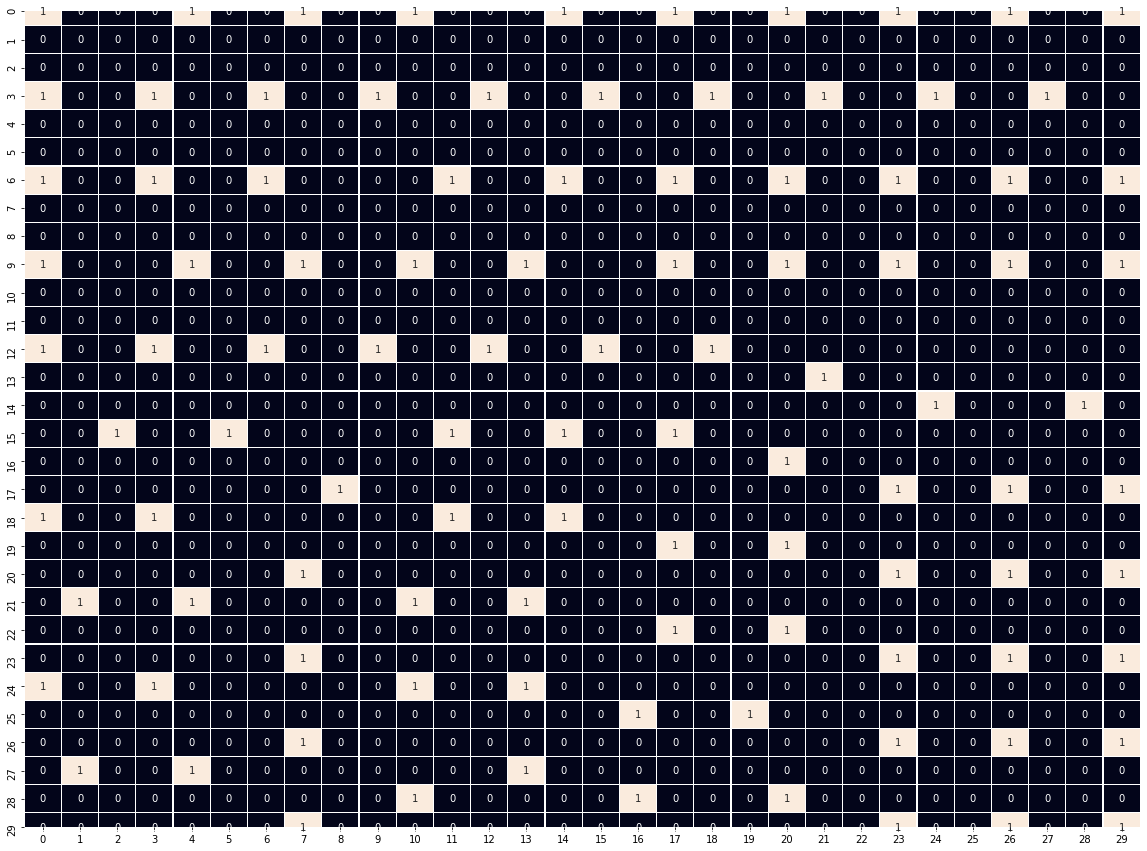

In [10]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(soln, linecolor = 'white', linewidths = 0.1, annot = True, ax = ax, cbar =False)

In [12]:
pd.DataFrame(soln).to_csv("seating_optimization_for_900_seats.csv")